# Structure of Text (TFIDF)

In [1]:
print("Hola")

Hola


In [1]:
#Import Libraries to get data

import psycopg2 as pg

import pandas as pd
import numpy as np

import re
import string

from ftfy import fix_encoding
# from ftfy import fix_text
# from ftfy import fixes

In [5]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    #text = fix_encoding(text)

    text = text.lower()
    
    text = re.sub('[‘’“”…«».]', '', text)
    text = re.sub('[\n\t]', ' ', text)
    text = re.sub("(\\d|\\W)+", ' ', text)  # Removing special characters and digits    
    text = text.replace("_","")
    
    return text

def drop_text(documents):
    

    new_documents = documents[~documents.contenido.str.contains('r[^\x00-\x7F]')]

    return new_documents


In [31]:
db_connection = pg.connect(dbname = "documentos", host = "127.0.0.1",user = "sangeeky", password = "4823")
sql_query = "SELECT contenido from documento limit 3000"

documents = pd.read_sql_query(sql_query, db_connection)

In [4]:
#db_connection.set_client_encoding('latin1')
print(db_connection.encoding)


UTF8


In [7]:
documents = table_documento
#documents.iloc[50:60]
documents
#documents['des'] = documents.apply(lambda row: clean_text(row['contenido']),axis=1)

,contenido
0,1 \n\n \n\nPARTICIPACIÓN DE LAS DOCENTES EN EL...
1,SIMULACIO´N EN PYTHIA 6 DE LA PRODUCCIO´N DE q...
2,1\nLAS FALENCIAS EN LAS DEMANDAS LABORALES EN ...
3,1 \n\n \n\n \n\nIMPLEMENTACIÓN DE LINEAS PRODU...
4,PROPUESTA PEDAGOGICA PARA LA CONSTRUCCION DE L...
...,...
995,1 \n \n\n \nESTUDIO SOCIOECONOMICO DEL SUBSECT...
996,“EL SENTIMIENTO ROMANTICO Y LA MAJESTUOSIDAD D...
997,1\nESTUDIO SOCIAL Y ECONÓMICO PARA DEFINIR LA ...
998,1 \n \n\nPLAN DE NEGOCIOS PARA EL MONTAJE DE U...


In [32]:
#Droping Null Values or Damaged Documents

tesis1 = pd.DataFrame(drop_text(documents))
display(tesis1)


,contenido
51,"!\n""#\n ""!\n$ #%#& ""!\n(!) !\n #*+,%,!\n$ ..."
60,"! ""# $%\n ! \n& (\n\n \t \n\n\n..."
111,1 \n \n\nDISEÑO DE CURSO PARA ENTORNOS VIRTUAL...
190,"!""\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\..."
234,"!\t\t\n\t\t""\t##\n\t\n\n\t$..."
286,14\n\n\n\n\n15\n\n\n\n\n16\n\n\n\n\n17\n\n\n\n...
304,13\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
305,
452,1 \n\n\t\t\t   \t \t  ...
539,MI CUENTO ES EL CUENTO \n\n \n\n \n\n \n\n \n\...


In [34]:
tesis1['contenido'][2879]
#tesis1['contenido'] = tesis1.apply(lambda row: clean_text(row['contenido']),axis=1)
#tesis1

'1 \n \n\nDISEÑO DE CURSO PARA ENTORNOS VIRTUALES \nCURSO VIRTUAL DE FOTOGRAFIA DIGITAL \n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n\nEVELIO SAUL CANTUCA NUPAN \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n\nUNIVERSIDAD DE NARIÑO \nFACULTAD DE ARTES \n\nLICENCIATURA EN ARTES VISUALES \nSAN JUAN DE PASTO \n\n2009  \n\n\n\n\n2 \n \n\nDISEÑO DE CURSO PARA ENTORNOS VIRTUALES \nCURSO VIRTUAL DE FOTOGRAFIA DIGITAL \n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n\nEVELIO SAUL CANTUCA NUPAN \n \n \n \n \n\nDIPLOMADO EN DISEÑO DE CURSOS PARA ENTORNOS VIRTUALES  \nPARA OPTAR AL TÍTULO DE LICENCIADO EN ARTES VISUALES \n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n\nUNIVERSIDAD DE NARIÑO \nFACULTAD DE ARTES \n\nLICENCIATURA EN ARTES VISUALES \nSAN JUAN DE PASTO \n\n2009  \n\n\n\n\n3 \n \n\n \n \n\nTABLA DE CONTENIDO \n \n \n\n           PÁG. \n \nRESUMEN                     4 \n       \nABSTRAC           5 \n \nCONCLUSIONES          6 \n \n \n \n\n \n \n \n \n \n \

In [35]:
documents['contenido'][3]

'1 \n\n \n\n \n\nIMPLEMENTACIÓN DE LINEAS PRODUCTIVAS EN FRUVER Y LÁCTEOS \nPARA LA UNIDAD PRODUCTIVA AGROINDUSTRIAL (U.P.A) EN LA PLANTA \n\nPILOTO DE LA FACULTAD DE INGENERÍA AGROINDUSTRIAL DE LA \nUNIVERSIDAD DE NARIÑO, SAN JUAN DE PASTO \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nDEICY ALEJANDRA AGUIRRE PAEZ \nVIVIANA KATALINA SANTACRUZ ENRIQUEZ \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nUNIVERSIDAD DE NARIÑO \nFACULTAD DE INGENIERÍA AGROINDUSTRIAL \n\nINGENIERÍA AGROINDUSTRIAL \nSAN JUAN DE PASTO \n\n2009 \n\n\n\n\n 2 \n\n \n\n \n\nIMPLEMENTACIÓN DE LINEAS PRODUCTIVAS EN FRUVER Y LÁCTEOS \nPARA LA UNIDAD PRODUCTIVA AGROINDUSTRIAL (U.P.A) EN LA PLANTA \n\nPILOTO DE LA FACULTAD DE INGENERÍA AGROINDUSTRIAL DE LA \nUNIVERSIDAD DE NARIÑO, SAN JUAN DE PASTO \n\n \n\n \n\n \n\n \n\n \n\nDEICY ALEJANDRA AGUIRRE PAEZ \nVIVIANA KATALINA SANTACRUZ ENRIQUEZ \n\n \n\n \n\nInforme de pasantía realizado como requisito para optar el título de Ingeniera \nAgroindustrial \n\n \n\n \

## Leer documentos Limpios 

In [2]:
clean_documents = pd.read_csv(r'./clean_documents.csv', usecols=['des'])
clean_documents.columns = ['corpus']
clean_documents.dropna()

,corpus
0,participación de las docentes en el concurso ...
1,simulacio n en pythia de la produccio n de q y...
2,las falencias en las demandas laborales en el...
3,implementación de lineas productivas en fruve...
4,propuesta pedagogica para la construccion de l...
...,...
995,estudio socioeconomico del subsector micro em...
996,el sentimiento romantico y la majestuosidad de...
997,estudio social y económico para definir la vi...
998,plan de negocios para el montaje de una empre...


In [3]:
text = clean_documents.iloc[:100]
del(clean_documents)
text

,corpus
0,participación de las docentes en el concurso ...
1,simulacio n en pythia de la produccio n de q y...
2,las falencias en las demandas laborales en el...
3,implementación de lineas productivas en fruve...
4,propuesta pedagogica para la construccion de l...
...,...
95,caracteristicas del modelo de desarrollo endo...
96,proyecto de grado de juan manuel bernate unive...
97,diagnóstico ambiental participativo para el fo...
98,guarda hoja en blanco contraportada portada n...


## TFIDF

In [3]:
import spacy
import spacy.cli
from nltk import word_tokenize
from string import punctuation
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

#spacy.cli.download("es_core_news_sm")
nlp = spacy.load('es_core_news_sm')

stemmer = SnowballStemmer('spanish')
#nltk.download('punkt')
#nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))

def lexeme_tokenize(text):
    
    text=text.lower()
    doc = nlp(text)
    lemmas = [t.lemma_.lower() for t in doc if not t.is_punct | t.is_stop]
    words = [t.lower() for t in lemmas if len(t) > 3 and t.isalpha()]
      
    return words 



tf_idf = TfidfVectorizer(max_df=0.6, min_df=2,
                     lowercase=True,
                     ngram_range = (1,1),
                     analyzer = 'word',
                     tokenizer = lexeme_tokenize,              
                     max_features=5000) 





print("Done!")


Done!


In [10]:
#Entrenamos el modelo TFIDF para hacer la matriz
tf_idf_t = tf_idf.fit_transform(text.corpus.apply(lambda x: np.str_(x))) 

In [11]:
tf_idf_t

<100x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 104046 stored elements in Compressed Sparse Row format>

In [15]:
df_tf_idf = pd.DataFrame(tf_idf_t.toarray(), columns=tf_idf.get_feature_names())
display(df_tf_idf.iloc[: ,4900:5000])

,virtual,virtud,viscosidad,visible,visionar,visitante,visitar,vislumbrar,visual,visualizar,...,éxito,índice,índole,íntegro,íntimamente,íntimo,ítem,óptico,órgano,óxido
0,0.000000,0.004867,0.0,0.008731,0.000000,0.000000,0.003585,0.000000,0.000000,0.000000,...,0.004684,0.006681,0.005036,0.0,0.000000,0.002825,0.005036,0.007980,0.002092,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.006829,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004382,0.004688,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005870,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.001764,0.000000,0.000000,0.000000,...,0.000768,0.023015,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.014796,0.0,0.000000,0.008975,0.004832,0.000000,0.019139,0.000000,0.000000,...,0.011868,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005023,...,0.007708,0.020614,0.000000,0.0,0.000000,0.000000,0.000000,0.006565,0.000000,0.0
96,0.059192,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
97,0.013252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040883,0.009945,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
98,0.003306,0.002966,0.0,0.005321,0.007196,0.000000,0.000000,0.000000,0.005099,0.002481,...,0.003806,0.000000,0.000000,0.0,0.003443,0.000000,0.000000,0.000000,0.000000,0.0


In [12]:
#Guardar Modelo

from joblib import dump, load
dump(tf_idf, './tf_idf.joblib') 

['./tf_idf.joblib']

In [5]:
#Cargar Modelo

from joblib import dump, load

modelo_tf_idf = load('./models/tf_idf.joblib') 
#terminos=modelo_tf_idf.transform(text.corpus)

In [ ]:
terminos

In [60]:
df_tf_idf = pd.DataFrame(terminos.toarray(), columns= modelo_tf_idf.get_feature_names())
display(df_tf_idf.iloc[: ,4900:5000])

,virtual,virtud,viscosidad,visible,visionar,visitante,visitar,vislumbrar,visual,visualizar,...,éxito,índice,índole,íntegro,íntimamente,íntimo,ítem,óptico,órgano,óxido
0,0.000000,0.004867,0.0,0.008731,0.000000,0.000000,0.003585,0.000000,0.000000,0.000000,...,0.004684,0.006681,0.005036,0.0,0.000000,0.002825,0.005036,0.007980,0.002092,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.006829,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004382,0.004688,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005870,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.001764,0.000000,0.000000,0.000000,...,0.000768,0.023015,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.014796,0.0,0.000000,0.008975,0.004832,0.000000,0.019139,0.000000,0.000000,...,0.011868,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005023,...,0.007708,0.020614,0.000000,0.0,0.000000,0.000000,0.000000,0.006565,0.000000,0.0
96,0.059192,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
97,0.013252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040883,0.009945,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
98,0.003306,0.002966,0.0,0.005321,0.007196,0.000000,0.000000,0.000000,0.005099,0.002481,...,0.003806,0.000000,0.000000,0.0,0.003443,0.000000,0.000000,0.000000,0.000000,0.0


In [9]:
df_tf_idf.to_csv(r'./sparse_matrix', index=False)

In [151]:
documentos.to_csv(r'./clean_documents',columns=['des'])

# BOW 


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
text = pd.read_csv(r'./lexemes.csv')
text

,corpus,lexemes
0,participación de las docentes en el concurso ...,"['participación', 'docente', 'concursar', 'dir..."
1,simulacio n en pythia de la produccio n de q y...,"['simulacio', 'pythia', 'produccio', 'gramo', ..."
2,las falencias en las demandas laborales en el...,"['falencias', 'demandar', 'laboral', 'municipi..."
3,implementación de lineas productivas en fruve...,"['implementación', 'linear', 'productivo', 'fr..."
4,propuesta pedagogica para la construccion de l...,"['proponer', 'pedagogica', 'construccion', 'li..."
...,...,...
95,caracteristicas del modelo de desarrollo endo...,"['caracteristicas', 'modelar', 'desarrollar', ..."
96,proyecto de grado de juan manuel bernate unive...,"['proyectar', 'gradar', 'juan', 'manuel', 'ber..."
97,diagnóstico ambiental participativo para el fo...,"['diagnóstico', 'ambiental', 'participativo', ..."
98,guarda hoja en blanco contraportada portada n...,"['guardar', 'hoja', 'blanco', 'contraportada',..."


In [13]:

#tokenizer to remove unwanted elements from out data like symbols and numbers

# cv = CountVectorizer(lowercase=True,
#                      ngram_range = (2,2),
#                      analyzer = 'word',
#                      tokenizer = lexeme_tokenize,
#                      stop_words = spanish_stopwords
#                     )

cv = CountVectorizer(lowercase=True,
                     ngram_range = (2,2),
                     analyzer = 'word'
                    )


In [14]:
text_counts= cv.fit_transform(text.lexemes)

In [15]:
text_counts

<100x644369 sparse matrix of type '<class 'numpy.int64'>'
	with 823373 stored elements in Compressed Sparse Row format>

In [21]:
dump(cv, './bow2.joblib')

['./bow2.joblib']

In [6]:
modelo_bow2 = load('./models/bow2.joblib') 
#text_counts= modelo_bow2.transform(text.corpus)

In [8]:
df_bow = pd.DataFrame(text_counts.toarray(), columns=modelo_bow2.get_feature_names())
#data_stop.index = df.index


display(df_bow.iloc[: ,10000:15000])

,actor entregar,actor escribir,actor establecer,actor estimar,actor estratégico,actor estructurar,actor estudiante,actor etapa,actor evaluar,actor experiencia,...,administrativo influjo,administrativo información,administrativo informar,administrativo informe,administrativo infraestructura,administrativo infringir,administrativo ingeniero,administrativo iniciar,administrativo injunction,administrativo instalación
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Guadar la SPARSE MATRIX


In [9]:
import scipy.sparse

scipy.sparse.save_npz('./sparse_matrix/sparse_matrix_bow2.npz', text_counts)
text_counts
#sparse_matrix = scipy.sparse.load_npz('/tmp/sparse_matrix.npz')

<100x643905 sparse matrix of type '<class 'numpy.int64'>'
	with 822779 stored elements in Compressed Sparse Row format>

# Wordcloud


In [38]:
len(cv.get_feature_names())

643905

### Escogiendo Features de los modelos

In [128]:
feature_names_bow = ' '.join(cv.get_feature_names())
#feature_names_tfidf = ' '.join(modelo_tf_idf.get_feature_names())


### Tomando Features de todos los documentos

In [80]:
text['lexemes'] = text.loc[:, 'corpus'].apply(lambda text: lexeme_tokenize(text))
text.to_csv(r'./lexemes.csv', index=False)
text

In [112]:
#all_lexemes = str([' ' + lexeme for word in text.loc[:0, 'lexemes'] ])

def get_all_lexemes(lexeme_list):
    
    lexemes = ' '.join(map(str, lexeme_list ))
    
    return lexemes
    
all_lexemes = ' '

for document_lexeme in text['lexemes']:
    
    all_lexemes += get_all_lexemes(document_lexeme)

len(all_lexemes)
    

10520831

In [111]:
text['lexemes']

0     [participación, docente, concursar, directivo,...
1     [simulacio, pythia, produccio, gramo, energi, ...
2     [falencias, demandar, laboral, municipio, past...
3     [implementación, linear, productivo, fruver, l...
4     [proponer, pedagogica, construccion, liderazgo...
                            ...                        
95    [caracteristicas, modelar, desarrollar, endoge...
96    [proyectar, gradar, juan, manuel, bernate, uni...
97    [diagnóstico, ambiental, participativo, fortal...
98    [guardar, hoja, blanco, contraportada, portar,...
99    [plan, estratégico, mercadear, electromillonar...
Name: lexemes, Length: 100, dtype: object

In [26]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [133]:
# wordcloud = WordCloud(
#                         background_color = 'white',
#                         stopwords = spanish_stopwords,
#                         max_words = 100,
#                         max_font_size = 150,
#                         random_state = 12,
#                         width=1280, height=720
#             ).generate(str(all_lexemes))

wordcloud = WordCloud(
                        
               
                        width=1280, height=720
            ).generate(str(all_lexemes))

In [28]:
print(wordcloud)

<function matplotlib.pyplot.show(*args, **kw)>

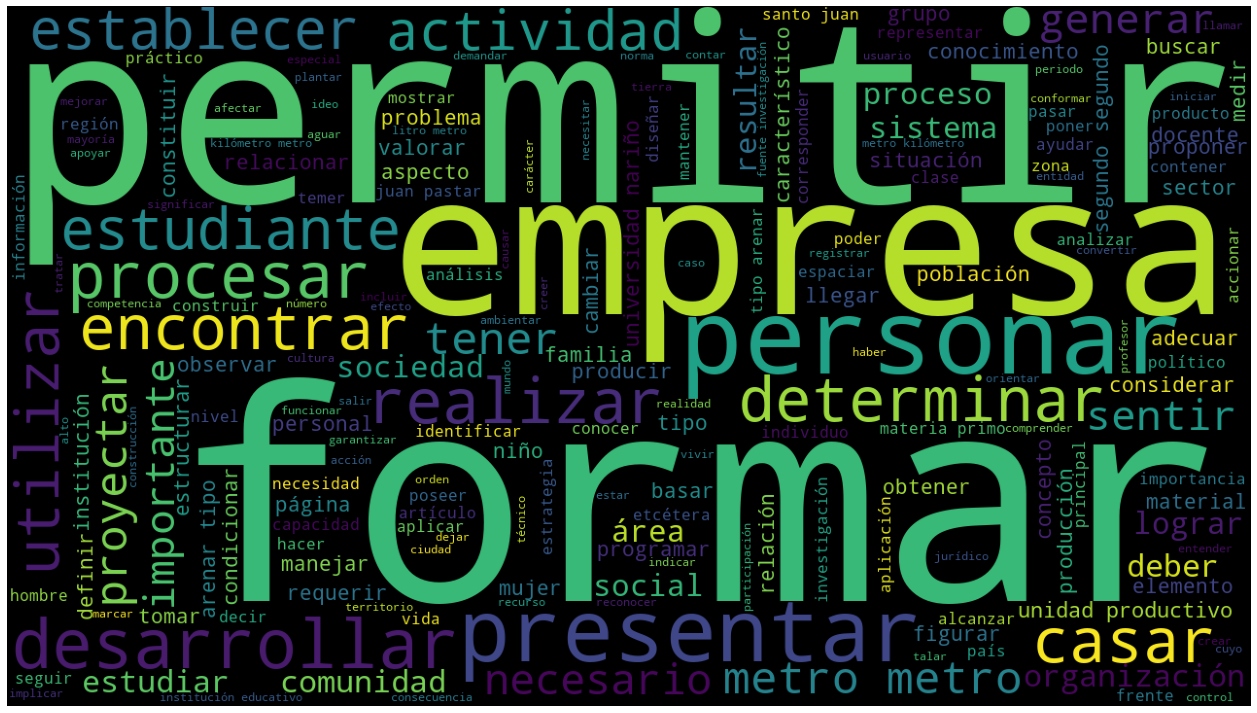

In [134]:
figure = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show

In [136]:
#figure.savefig("word1.png", dpi=900)
figure.savefig('wordcloud_bow3.png', facecolor='k', bbox_inches='tight')

## GRAFICAS DE FRECUENCIAS 

In [11]:
terminos_tfidf = pd.read_csv('./sparse_matrix/sparse_matrix_tfidf.csv')

terminos_tfidf.to_numpy()

array([[0.        , 0.00544262, 0.00495413, ..., 0.00798013, 0.00209174,
        0.        ],
       [0.        , 0.00398863, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00587047,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00221122, 0.00201276, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00149121, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
import scipy.sparse
sparse_matrix_tfidf = scipy.sparse.csr_matrix(terminos_tfidf)  
sparse_matrix_tfidf

<100x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 104046 stored elements in Compressed Sparse Row format>

In [13]:
import scipy.sparse

sparse_matrix_bow2 = scipy.sparse.load_npz('./sparse_matrix/sparse_matrix_bow2.npz')

### NOTA

Se debe leer las matrices como sparse matrix y en un DataFrame se le añaden los atributos

In [9]:
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies
from yellowbrick.features import RadViz

# Instantiate the visualizer using the ``size`` param
visualizer = RadViz(
    classes=classes, features=features, size=(1080, 720)
)

/home/sangeeky/anaconda3/envs/tesis/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


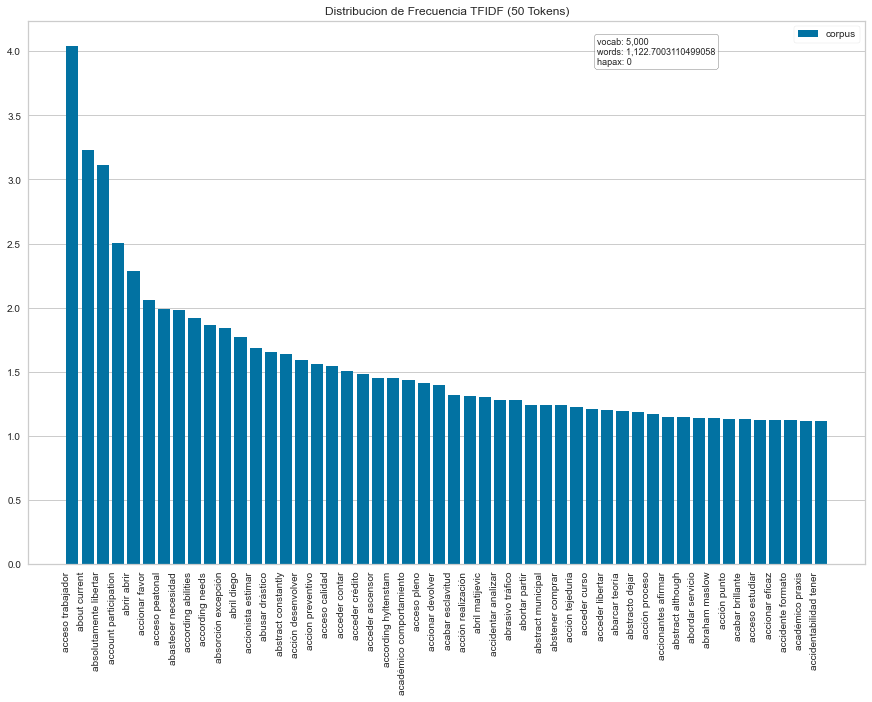

In [28]:

features_tfidf   = modelo_tf_idf.get_feature_names()

visualizer = FreqDistVisualizer(features=features_bow2, orient='v', title='Distribucion de Frecuencia TFIDF (50 Tokens)' ,size=(1080, 720))
visualizer.fit(sparse_matrix_tfidf)
visualizer.show(outpath="tfidf_frequency.png")

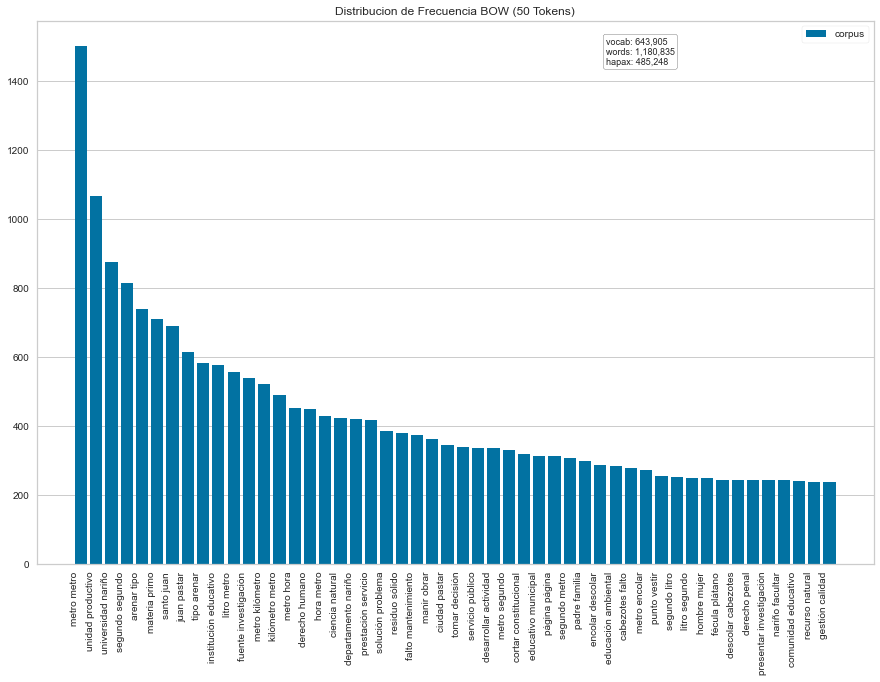

In [18]:
features_bow2  = modelo_bow2.get_feature_names()

visualizer = FreqDistVisualizer(features=features_bow2, orient='v', title='Distribucion de Frecuencia BOW (50 Tokens)' ,size=(1080, 720))
visualizer.fit(sparse_matrix_bow2)
visualizer.show(outpath="bow_frequency.png")

## Creación de Clusters 

Se usara MiniBatch que son una especie de miniclusters y menos consumo de procesamiento

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score


In [57]:
def find_optimal_clusters_silhoutte(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    silhoutte = []
    for k in iters:
        #sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        
        clusters = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data)
        sse.append(clusters.inertia_)
        
        silhouette_avg = silhouette_score(data, clusters.labels_)
        silhoutte.append(silhouette_avg)
        
        print('Fit {} clusters ----- Silhoutte avg: {}'.format(k, silhouette_avg))
    
    plt.plot(iters, silhoutte)
    plt.title("Silhouette score values vs Numbers of Clusters ")
    plt.show()
    
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
    


In [89]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=100, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=100).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=100, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    #plt.savefig('Cluster PCA.png', dpi = 300)

    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    plt.savefig('Cluster TSNE.png', dpi = 300)
    


### Cluster TFIDF

Fit 2 clusters ----- Silhoutte avg: 0.01458079750958556
Fit 4 clusters ----- Silhoutte avg: 0.027021907689109826
Fit 6 clusters ----- Silhoutte avg: 0.02047570825708738
Fit 8 clusters ----- Silhoutte avg: 0.03826479323907418
Fit 10 clusters ----- Silhoutte avg: 0.024528902637254366
Fit 12 clusters ----- Silhoutte avg: 0.03384119447614965
Fit 14 clusters ----- Silhoutte avg: 0.03249013017226895
Fit 16 clusters ----- Silhoutte avg: 0.03474959322132737
Fit 18 clusters ----- Silhoutte avg: 0.027200436247767433
Fit 20 clusters ----- Silhoutte avg: 0.0338048376871408


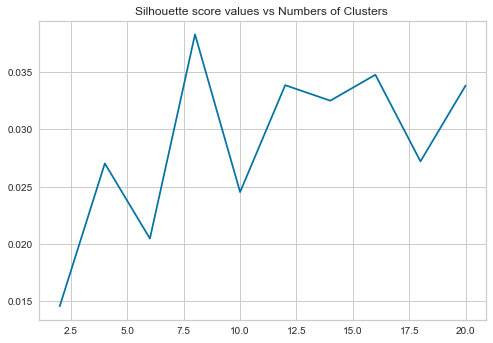

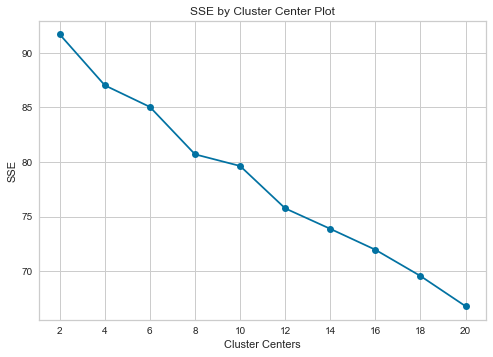

In [59]:
#OPTIMAL CLUSTER TFIDF
find_optimal_clusters_silhoutte(sparse_matrix_tfidf, 20)

In [70]:
# Creacion de Cluster y su Grafica

clusters_tfidf = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(sparse_matrix_tfidf)

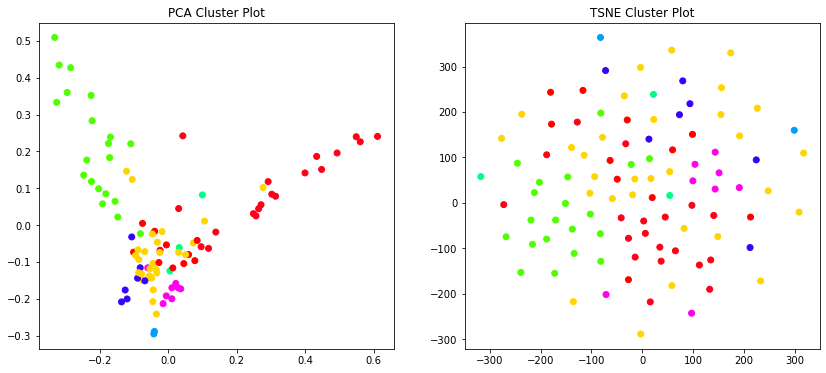

In [71]:
plot_tsne_pca(sparse_matrix_tfidf, clusters_tfidf)

### Cluster BOW

Fit 2 clusters ----- Silhoutte avg: 0.7385312018082898
Fit 4 clusters ----- Silhoutte avg: 0.20497942585510692
Fit 6 clusters ----- Silhoutte avg: 0.18075264147326528
Fit 8 clusters ----- Silhoutte avg: 0.21940539878838083
Fit 10 clusters ----- Silhoutte avg: 0.09950189811472106
Fit 12 clusters ----- Silhoutte avg: 0.2359128382309578
Fit 14 clusters ----- Silhoutte avg: -0.25286354087521373
Fit 16 clusters ----- Silhoutte avg: 0.10558166772587142
Fit 18 clusters ----- Silhoutte avg: 0.11248143972077389
Fit 20 clusters ----- Silhoutte avg: 0.08261003923081763


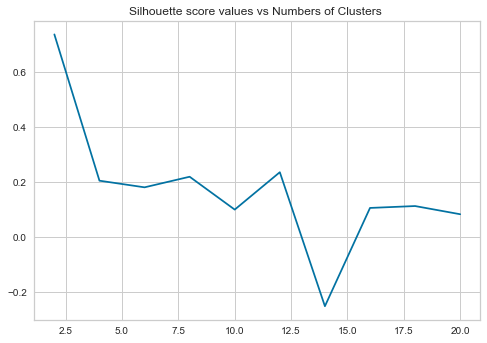

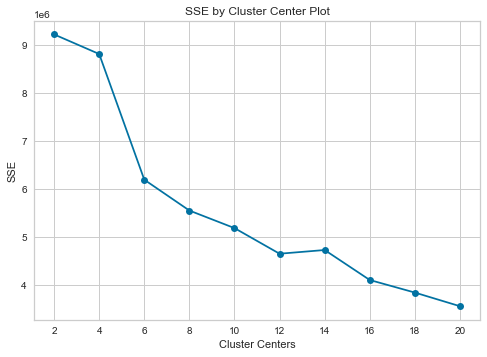

In [60]:
#OPTIMAL CLUSTER BOW SILhoutte
find_optimal_clusters_silhoutte(sparse_matrix_bow2, 20)

In [73]:
# Creacion de Cluster y su Grafica

#clusters_bow = MiniBatchKMeans(n_clusters=2, init_size=1024, batch_size=2048, random_state=20).fit_predict(sparse_matrix_bow2)
clusters_bow2 = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=12).fit_predict(sparse_matrix_bow2)

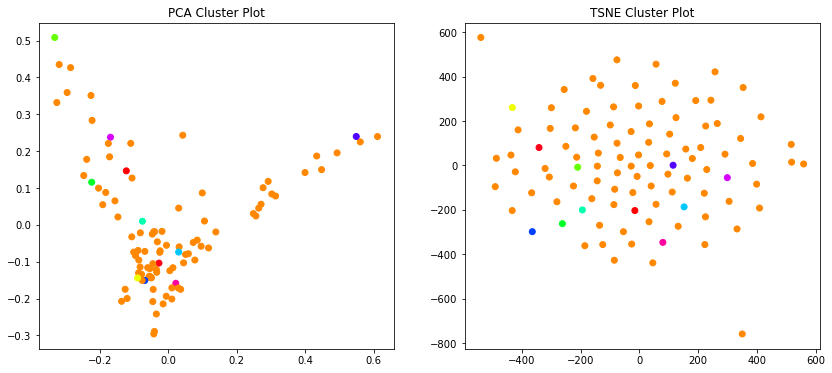

In [74]:
plot_tsne_pca(sparse_matrix_tfidf, clusters_bow2)

In [84]:
from sklearn.cluster import KMeans

clusters_bow2 = KMeans(n_clusters=12, random_state=12, n_jobs=-1, verbose=1).fit_predict(sparse_matrix_bow2)

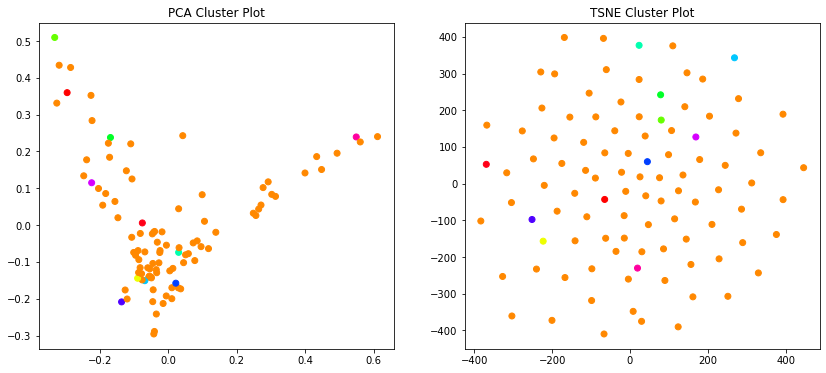

In [93]:
plot_tsne_pca(sparse_matrix_tfidf, clusters_bow2)